In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as probplot
import seaborn as sns
import glob
import json

In [56]:
df = pd.read_csv('data/original_responses/dietary_decision_results_Yashraj_J_Deshmukh.csv')
df.head(2)

,text,rt,key_press,block_duration,timing_post_trial,trial_id,trial_type,trial_index,time_elapsed,internal_node_id,...,stim_duration,exp_stage,stim,coded_response,trial_num,reference,stim_rating,reference_rating,responses,credit_var
0,"<div class = centerbox><p class = ""center-bloc...",2713.0,13.0,2713.0,0.0,instruction,poldrack-text,0,2715,0.0-0.0-0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,11534.0,NaN,NaN,NaN,instruction,poldrack-instructions,1,14250,0.0-0.0-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df.columns

Index(['text', 'rt', 'key_press', 'block_duration', 'timing_post_trial',
       'trial_id', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'exp_id', 'full_screen', 'focus_shifts',
       'view_history', 'mouse_click', 'stim_duration', 'exp_stage', 'stim',
       'coded_response', 'trial_num', 'reference', 'stim_rating',
       'reference_rating', 'responses', 'credit_var'],
      dtype='object')

In [58]:
df_health_rating = df[df['exp_stage'] == 'health_rating']
df_taste_rating = df[df['exp_stage'] == 'taste_rating']
df_decision = df[df['exp_stage'] == 'decision']
df_health_rating.head(2)

,text,rt,key_press,block_duration,timing_post_trial,trial_id,trial_type,trial_index,time_elapsed,internal_node_id,...,stim_duration,exp_stage,stim,coded_response,trial_num,reference,stim_rating,reference_rating,responses,credit_var
3,NaN,-1.0,NaN,4000.0,500.0,stim,single-stim-button,3,24178,0.0-2.0,...,4000.0,health_rating,RiceKrispyTreat,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,NaN,2144.0,NaN,2144.0,500.0,stim,single-stim-button,4,26832,0.0-3.0,...,2144.0,health_rating,KitKat,0.0,1.0,NaN,NaN,NaN,NaN,NaN


# Combining DataFrames

In [59]:
file_name_start = "data/original_responses/dietary_decision_results_"
subject_mapping = {}
combined_df = None
for i, data in enumerate(glob.glob('data/original_responses/*.csv')):
    df = pd.read_csv(data)
    subject_name = data[len(file_name_start):-4]
    df['subject'] = i  # Add a new column for subject identification
    if combined_df is None:
        combined_df = df
    else:
        combined_df = pd.concat([combined_df, df])
    subject_mapping[subject_name] = i

In [60]:
combined_df.dropna(subset=['coded_response'], inplace=True)

In [61]:
combined_df_health = combined_df[combined_df['exp_stage'] == 'health_rating']
combined_df_taste = combined_df[combined_df['exp_stage'] == 'taste_rating']
combined_df_decision = combined_df[combined_df['exp_stage'] == 'decision']

In [62]:
combined_df.to_csv('data/combined_df.csv', index=False)
combined_df_health.to_csv('data/combined_df_health.csv', index=False)
combined_df_taste.to_csv('data/combined_df_taste.csv', index=False)
combined_df_decision.to_csv('data/combined_df_decision.csv', index=False)

Transforming Data for Normalization

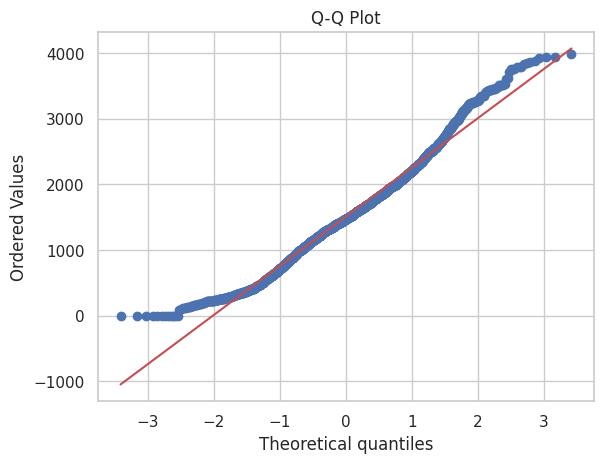

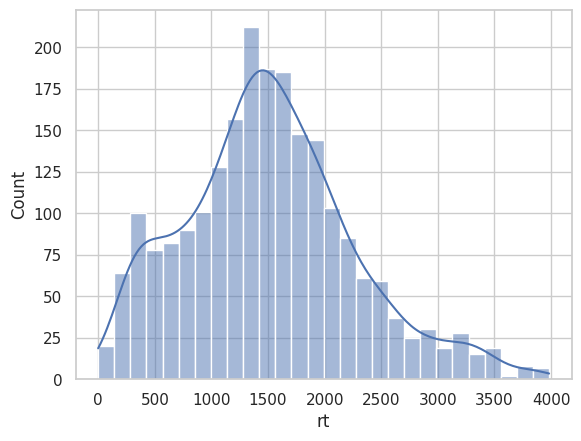

In [ ]:
# Before transformation
from scipy.stats import probplot
plt.figure()
probplot(combined_df['rt'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

sns.histplot(combined_df['rt'], kde=True)
plt.show()


In [64]:
# Apply square root transformation
combined_df['rt_sqrt'] = np.sqrt(combined_df['rt'])

/home/sahil/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


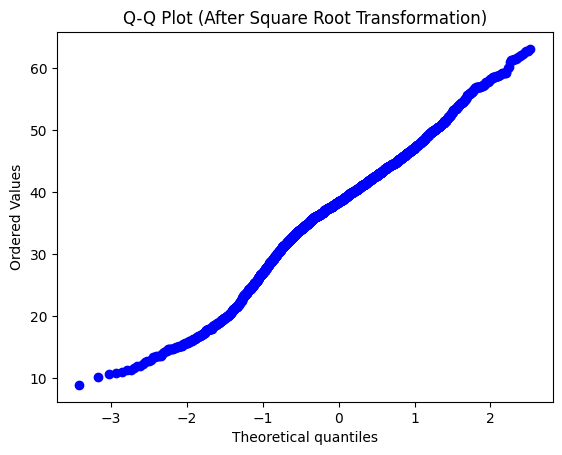

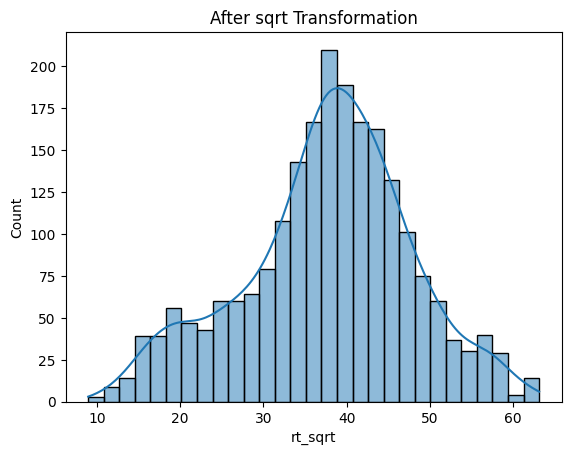

In [65]:
# After square root transformation
plt.figure()
probplot(combined_df['rt_sqrt'], dist="norm", plot=plt)
plt.title("Q-Q Plot (After Square Root Transformation)")
plt.show()

# After transformation
sns.histplot(combined_df['rt_sqrt'], kde=True)
plt.title('After sqrt Transformation')
plt.show()

# Taste

In [66]:
combined_df_taste[combined_df_taste['stim'] == 'KitKat'].coded_response

12     2.0
41     2.0
59     0.0
96     2.0
101    0.0
69     1.0
46    -1.0
63     2.0
71     2.0
83     1.0
38     1.0
15     1.0
97     1.0
73     2.0
65     1.0
Name: coded_response, dtype: float64

In [67]:
combined_df_taste[combined_df_taste['stim'] == 'KitKat'].coded_response.value_counts()

coded_response
 2.0    6
 1.0    6
 0.0    2
-1.0    1
Name: count, dtype: int64

In [68]:
17/15, combined_df_taste[combined_df_taste['stim'] == 'KitKat'].coded_response.mean()

(1.1333333333333333, 1.1333333333333333)

In [69]:
combined_group_taste = combined_df_taste.groupby('stim')['coded_response'].agg(['mean', 'std', 'count']).reset_index().sort_values('mean', ascending=False)
combined_group_taste['std_error'] = combined_group_taste['std'] / np.sqrt(combined_group_taste['count'])
combined_group_taste.columns = ['Item_name', 'mean_rating', 'std_rating', 'count', 'std_error']
combined_group_taste.reset_index(drop=True, inplace=True)
combined_group_taste

,Item_name,mean_rating,std_rating,count,std_error
0,reddelicious,1.266667,0.961150,15,0.248168
1,cookiencream,1.200000,1.082326,15,0.279455
2,KitKat,1.133333,0.915475,15,0.236375
3,orange,1.000000,1.000000,15,0.258199
4,cherryicecream,1.000000,0.755929,15,0.195180
5,icecreamsandwich,1.000000,1.195229,15,0.308607
6,Oreos,1.000000,1.154701,13,0.320256
7,banana,0.933333,1.032796,15,0.266667
8,Lindt,0.933333,1.099784,15,0.283963
9,laysclassic,0.928571,0.997249,14,0.266526


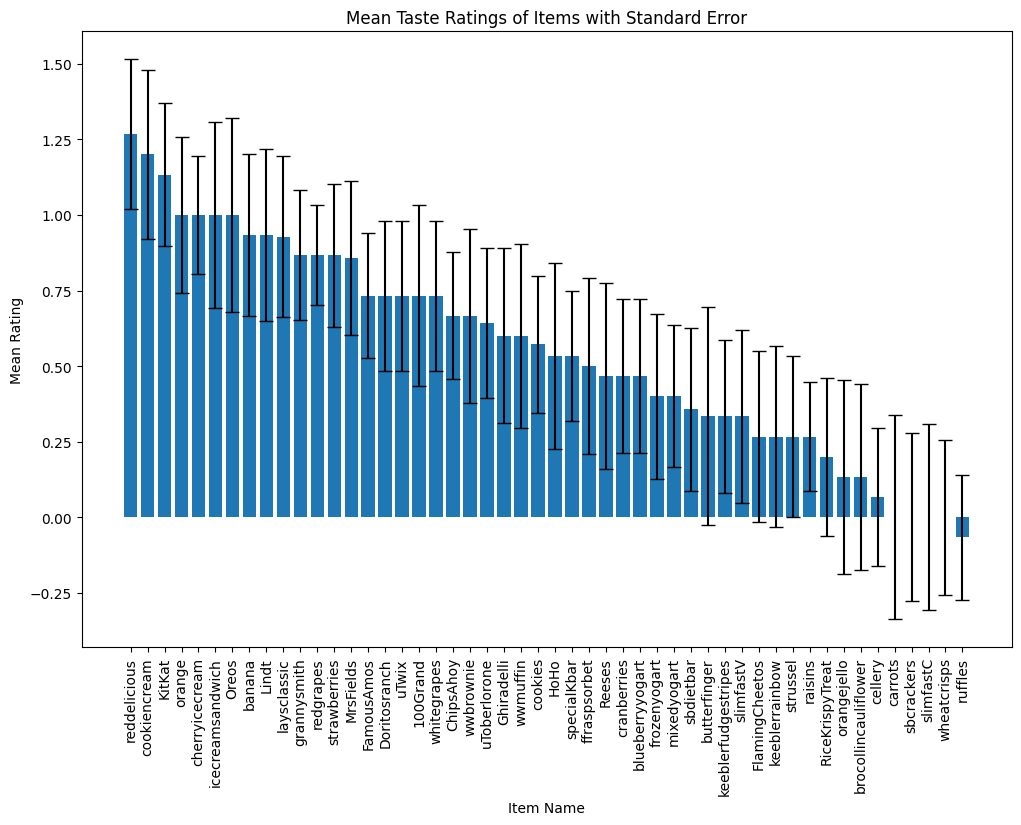

In [70]:
plt.figure(figsize=(12, 8))
plt.bar(combined_group_taste['Item_name'], combined_group_taste['mean_rating'], yerr=combined_group_taste['std_error'], capsize=5)
plt.xticks(rotation=90)
plt.xlabel('Item Name')
plt.ylabel('Mean Rating')
plt.title('Mean Taste Ratings of Items with Standard Error')
plt.show()

In [71]:
max_rating = combined_group_taste[combined_group_taste['mean_rating'] == combined_group_taste['mean_rating'].max()]
min_rating = combined_group_taste[combined_group_taste['mean_rating'] == combined_group_taste['mean_rating'].min()]
max_rating

,Item_name,mean_rating,std_rating,count,std_error
0,reddelicious,1.266667,0.96115,15,0.248168


In [72]:
min_rating

,Item_name,mean_rating,std_rating,count,std_error
49,ruffles,-0.066667,0.798809,15,0.206252


# Health

In [73]:
combined_group_health = combined_df_health.groupby('stim')['coded_response'].agg(['mean', 'std', 'count']).reset_index().sort_values('mean', ascending=False)
combined_group_health['std_error'] = combined_group_health['std'] / np.sqrt(combined_group_health['count'])
combined_group_health.columns = ['Item_name', 'mean_rating', 'std_rating', 'count', 'std_error']
combined_group_health.reset_index(drop=True, inplace=True)
combined_group_health

,Item_name,mean_rating,std_rating,count,std_error
0,grannysmith,1.642857,0.744946,14,0.199095
1,banana,1.533333,0.833809,15,0.215289
2,reddelicious,1.466667,0.915475,15,0.236375
3,orange,1.400000,0.985611,15,0.254484
4,whitegrapes,1.333333,0.723747,15,0.186871
5,strawberries,1.266667,0.961150,15,0.248168
6,redgrapes,1.000000,1.240347,14,0.331497
7,cranberries,0.928571,0.916875,14,0.245045
8,brocollincauliflower,0.846154,0.898717,13,0.249259
9,raisins,0.642857,1.215739,14,0.324920


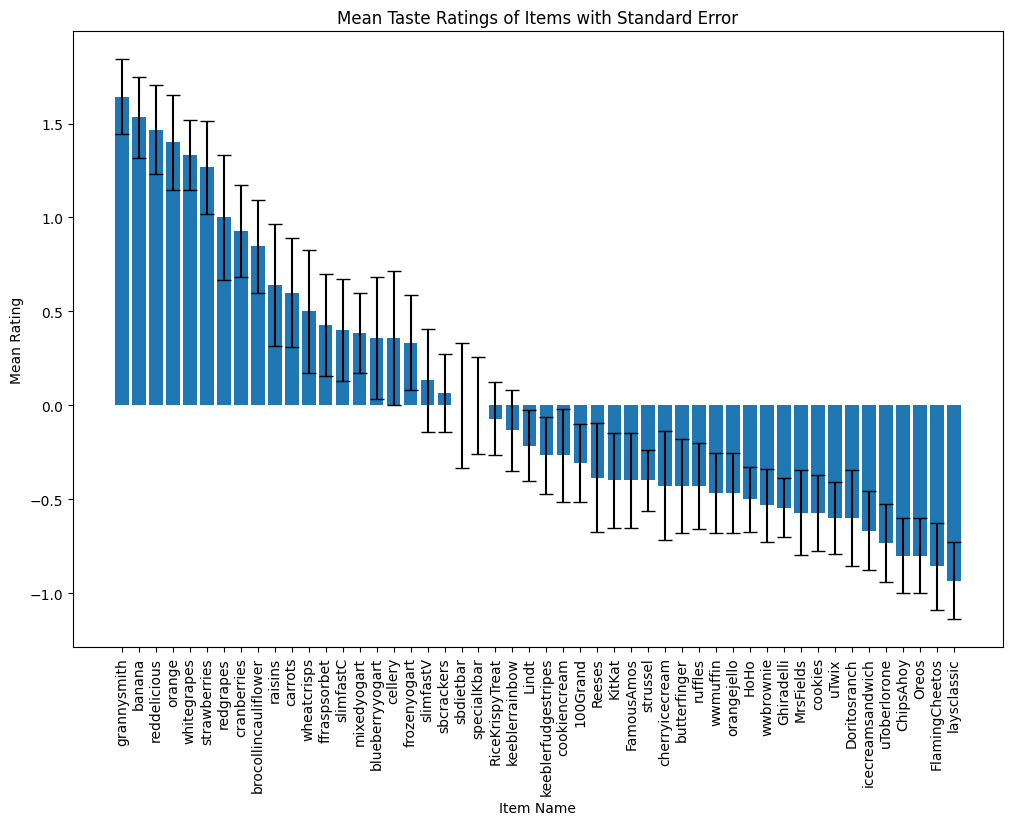

In [74]:
plt.figure(figsize=(12, 8))
plt.bar(combined_group_health['Item_name'], combined_group_health['mean_rating'], yerr=combined_group_health['std_error'], capsize=5)
plt.xticks(rotation=90)
plt.xlabel('Item Name')
plt.ylabel('Mean Rating')
plt.title('Mean Taste Ratings of Items with Standard Error')
plt.show()

In [75]:
max_rating = combined_group_health[combined_group_health['mean_rating'] == combined_group_health['mean_rating'].max()]
min_rating = combined_group_health[combined_group_health['mean_rating'] == combined_group_health['mean_rating'].min()]
max_rating

,Item_name,mean_rating,std_rating,count,std_error
0,grannysmith,1.642857,0.744946,14,0.199095


In [76]:
min_rating

,Item_name,mean_rating,std_rating,count,std_error
49,laysclassic,-0.933333,0.798809,15,0.206252


# SC and NSC

In [77]:
combined_df_decision.head(7)

,text,rt,key_press,block_duration,timing_post_trial,trial_id,trial_type,trial_index,time_elapsed,internal_node_id,...,exp_stage,stim,coded_response,trial_num,reference,stim_rating,reference_rating,responses,credit_var,subject
106,NaN,1331.0,NaN,1331.0,500.0,stim,single-stim-button,106,276093,0.0-105.0,...,decision,100Grand,1.0,0.0,wwbrownie,"{""taste"":1,""health"":""NaN""}","{""taste"":1,""health"":1}",NaN,NaN,0
107,NaN,3116.0,NaN,3116.0,500.0,stim,single-stim-button,107,279713,0.0-106.0,...,decision,Ghiradelli,1.0,1.0,wwbrownie,"{""taste"":1,""health"":-1}","{""taste"":1,""health"":1}",NaN,NaN,0
108,NaN,1823.0,NaN,1823.0,500.0,stim,single-stim-button,108,282044,0.0-107.0,...,decision,grannysmith,1.0,2.0,wwbrownie,"{""taste"":1,""health"":2}","{""taste"":1,""health"":1}",NaN,NaN,0
109,NaN,1199.0,NaN,1199.0,500.0,stim,single-stim-button,109,283747,0.0-108.0,...,decision,icecreamsandwich,1.0,3.0,wwbrownie,"{""taste"":1,""health"":-1}","{""taste"":1,""health"":1}",NaN,NaN,0
110,NaN,2567.0,NaN,2567.0,500.0,stim,single-stim-button,110,286829,0.0-109.0,...,decision,wheatcrisps,-1.0,4.0,wwbrownie,"{""taste"":-1,""health"":1}","{""taste"":1,""health"":1}",NaN,NaN,0
111,NaN,2388.0,NaN,2388.0,500.0,stim,single-stim-button,111,289723,0.0-110.0,...,decision,slimfastC,-1.0,5.0,wwbrownie,"{""taste"":-1,""health"":0}","{""taste"":1,""health"":1}",NaN,NaN,0
112,NaN,1337.0,NaN,1337.0,500.0,stim,single-stim-button,112,291572,0.0-111.0,...,decision,laysclassic,2.0,6.0,wwbrownie,"{""taste"":1,""health"":-1}","{""taste"":1,""health"":1}",NaN,NaN,0


In [78]:
# Taking the rows where the coded_response is not neutral
decision_df = combined_df_decision.copy()
decision_df = decision_df[decision_df['coded_response'] != 0]

In [79]:
def transform_decision(value):
    if value == 1 or value == 2:
        return 1
    else:
        return -1

decision_df['transformed_response'] = decision_df['coded_response'].apply(transform_decision)
decision_df.head(2)

,text,rt,key_press,block_duration,timing_post_trial,trial_id,trial_type,trial_index,time_elapsed,internal_node_id,...,stim,coded_response,trial_num,reference,stim_rating,reference_rating,responses,credit_var,subject,transformed_response
106,NaN,1331.0,NaN,1331.0,500.0,stim,single-stim-button,106,276093,0.0-105.0,...,100Grand,1.0,0.0,wwbrownie,"{""taste"":1,""health"":""NaN""}","{""taste"":1,""health"":1}",NaN,NaN,0,1
107,NaN,3116.0,NaN,3116.0,500.0,stim,single-stim-button,107,279713,0.0-106.0,...,Ghiradelli,1.0,1.0,wwbrownie,"{""taste"":1,""health"":-1}","{""taste"":1,""health"":1}",NaN,NaN,0,1


# Subject Classification

In [216]:
import json
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

In [ ]:
sc_id = []
nsc_id = []

def condition_one(df, subject_id):
    total = len(df)
    count = 0
    for i, row in df.iterrows():
        if (row['coded_response'] == 1 or row['coded_response'] == 2):
            data = json.loads(row['stim_rating'])
            # temp = {}
            # for k, v in data.items():
            #     if v == "NaN":
            #         temp[k] = np.nan
            #     else:
            #         temp[k] = v
            # data = temp
            # print(data)
            # print(type(data['health']))
            # print("type", type(data['health']))
            if (data['taste'] == -1 or data['taste'] == -2):
                if (data['health'] == 1 or data['health'] == 2):
                    count+=1
        elif (row['coded_response'] == -1 or row['coded_response'] == -2):
            data = json.loads(row['stim_rating'])
            if (data['taste'] == 1 or data['taste'] == 2):
                if (data['health'] == -1 or data['health'] == -2):
                    count+=1
        # break
    if count/total >= 0.5:
        return True
    return False

def condition_two(df):
    # df['stim_rating'] = df['stim_rating'].apply(json.loads)
    # df['health_rating'] = df['stim_rating'].apply(lambda x: np.nan if x['health'] == "NaN" else x['health'])
    # df['taste_rating'] = df['stim_rating'].apply(lambda x: np.nan if x['taste'] == "NaN" else x['taste'])
    # df.dropna(subset=['health_rating', 'taste_rating'], inplace=True)

    # X = df[['health_rating', 'taste_rating']]
    # y = df['coded_response']

    X_health = []
    X_taste = []
    y = []

    for i, row in df.iterrows():
        data = json.loads(row['stim_rating'])
        if not isinstance(data.get('health'), int):
            continue
        if not isinstance(data.get('taste'), int):
            continue
        X_health.append(data['health'])
        X_taste.append(data['taste'])
        y.append(row['coded_response'])

    X_health = np.array(X_health).reshape(-1, 1)
    X_taste = np.array(X_taste).reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)

    X = np.hstack((X_health, X_taste))

    model = LinearRegression()
    model.fit(X, y)

    print(model.coef_)

    if model.coef_[0][0] > model.coef_[0][1]:
        return True
    return False


def condition_three(df):
    # df['stim_rating'] = df['stim_rating'].apply(json.loads)
    # df['health_rating'] = df['stim_rating'].apply(lambda x: x['health'])
    # df['taste_rating'] = df['stim_rating'].apply(lambda x: x['taste'])
    # df.dropna(subset=['health_rating', 'taste_rating'], inplace=True)
    X_health = []
    X_taste = []
    y = []

    for i, row in df.iterrows():
        data = json.loads(row['stim_rating'])
        print(data.get('health'), data.get('taste'), type(data.get('health')), type(data.get('taste')))
        if not isinstance(data.get('health'), int):
            print("done")
            continue
        if not isinstance(data.get('taste'), int):
            print("done")
            continue
        # if data.get('health').strip() == "NaN" or data.get('taste').strip() == "NaN":
        #     continue
        # if isinstance(data.get('health'), str) or isinstance(data.get('taste'), str):
        #     print(data.get('health'), data.get('taste'))
        #     continue
        X_health.append(data['health'])
        X_taste.append(data['taste'])
        y.append(row['coded_response'])

    X_health = np.array(X_health).reshape(-1,1)
    X_taste = np.array(X_taste).reshape(-1,1)
    y = np.array(y).reshape(-1, 1)

    # X_health = df[['health_rating']]
    # y = df['coded_response']
    # X_taste = df[['taste_rating']]
    # y = df['coded_response']

    model_health = LinearRegression()
    model_health.fit(X_health, y)
    model_taste = LinearRegression()
    model_taste.fit(X_taste, y)

    y_pred_health = model_health.predict(X_health)
    y_pred_taste = model_taste.predict(X_taste)

    r2_health = r2_score(y, y_pred_health)
    r2_taste = r2_score(y, y_pred_taste)

    if r2_health > r2_taste:
        return True
    return False

def satisfy_conditons(df, subject_id):
    if (condition_one(df, subject_id) or condition_two(df) or condition_three(df)):
        sc_id.append(subject_id)
    else:
        nsc_id.append(subject_id)

for subject_id in range(15):
    df = decision_df[decision_df['subject'] == subject_id].copy()
    satisfy_conditons(df, subject_id)
    # break


[[0.05236729 0.87876614]]
NaN 1 <class 'str'> <class 'int'>
done
-1 1 <class 'int'> <class 'int'>
2 1 <class 'int'> <class 'int'>
-1 1 <class 'int'> <class 'int'>
1 -1 <class 'int'> <class 'int'>
0 -1 <class 'int'> <class 'int'>
-1 1 <class 'int'> <class 'int'>
1 0 <class 'int'> <class 'int'>
1 0 <class 'int'> <class 'int'>
-1 2 <class 'int'> <class 'int'>
2 1 <class 'int'> <class 'int'>
0 1 <class 'int'> <class 'int'>
1 -1 <class 'int'> <class 'int'>
0 1 <class 'int'> <class 'int'>
1 1 <class 'int'> <class 'int'>
2 1 <class 'int'> <class 'int'>
-2 NaN <class 'int'> <class 'str'>
done
1 -1 <class 'int'> <class 'int'>
2 1 <class 'int'> <class 'int'>
2 1 <class 'int'> <class 'int'>
-1 1 <class 'int'> <class 'int'>
2 1 <class 'int'> <class 'int'>
1 0 <class 'int'> <class 'int'>
-1 2 <class 'int'> <class 'int'>
-1 1 <class 'int'> <class 'int'>
1 -1 <class 'int'> <class 'int'>
2 -2 <class 'int'> <class 'int'>
1 0 <class 'int'> <class 'int'>
-1 0 <class 'int'> <class 'int'>
2 -2 <class 'int'

In [204]:
sc_id, nsc_id

([8, 10, 12, 14], [0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 13])

In [206]:
for k, v in subject_mapping.items():
    if v in sc_id:
        print(k, v)

Yash_Patil 8
Shreshth_Balot 10
Deven_Patil 12
Pawar_Tamanna 14


In [222]:
def count_disliked_unhealthy(df):
    disliked_unhealthy = 0
    for index, row in df.iterrows():
        if row["exp_stage"] == "decision":
            stim_rating = eval(row["stim_rating"])
            if (stim_rating["taste"] == "NaN" or stim_rating["health"] == "NaN" or row["coded_response"] == "NaN"):
                continue
            if int(row["coded_response"]) > 0:
                if int(stim_rating["taste"]) < 0:
                    if int(stim_rating["health"]) < 0:
                        disliked_unhealthy += 1
        else:
            continue
    return disliked_unhealthy

def count_disliked_healthy(df):
    disliked_healthy = 0
    for index, row in df.iterrows():
        if row["exp_stage"] == "decision":
            stim_rating = eval(row["stim_rating"])
            if (stim_rating["taste"] == "NaN" or stim_rating["health"] == "NaN" or row["coded_response"] == "NaN"):
                continue
            if int(row["coded_response"]) > 0:
                if int(stim_rating["taste"]) < 0:
                    if int(stim_rating["health"]) > 0:
                        disliked_healthy += 1
        else:
            continue
    return disliked_healthy

def count_liked_unhealthy(df):
    liked_unhealthy = 0
    for index, row in df.iterrows():
        if row["exp_stage"] == "decision":
            stim_rating = eval(row["stim_rating"])
            if (stim_rating["taste"] == "NaN" or stim_rating["health"] == "NaN" or row["coded_response"] == "NaN"):
                continue
            if int(row["coded_response"]) > 0:
                if int(stim_rating["taste"]) > 0:
                    if int(stim_rating["health"]) < 0:
                        liked_unhealthy += 1
        else:
            continue
    return liked_unhealthy

def count_liked_healthy(df):
    liked_healthy = 0
    for index, row in df.iterrows():
        if row["exp_stage"] == "decision":
            stim_rating = eval(row["stim_rating"])
            if (stim_rating["taste"] == "NaN" or stim_rating["health"] == "NaN" or row["coded_response"] == "NaN"):
                continue
            if int(row["coded_response"]) > 0:
                if int(stim_rating["taste"]) > 0:
                    if int(stim_rating["health"]) > 0:
                        liked_healthy += 1
        else:
            continue
    return liked_healthy

disliked_unhealthy = {"SC":0, "NSC":0}
disliked_healthy = {"SC":0, "NSC":0}
liked_unhealthy = {"SC":0, "NSC":0}
liked_healthy = {"SC":0, "NSC":0}


for subject_id in sc_id:
    df = decision_df[decision_df['subject'] == subject_id].copy()
    disliked_unhealthy["SC"] += count_disliked_unhealthy(df)
    disliked_healthy["SC"] += count_disliked_healthy(df)
    liked_unhealthy["SC"] += count_liked_unhealthy(df)
    liked_healthy["SC"] += count_liked_healthy(df)

for subject_id in nsc_id:
    df = decision_df[decision_df['subject'] == subject_id].copy()
    disliked_unhealthy["NSC"] += count_disliked_unhealthy(df)
    disliked_healthy["NSC"] += count_disliked_healthy(df)
    liked_unhealthy["NSC"] += count_liked_unhealthy(df)
    liked_healthy["NSC"] += count_liked_healthy(df)

data = {
    "Category": [
        "Disliked Unhealthy", "Disliked Unhealthy",
        "Disliked Healthy", "Disliked Healthy",
        "Liked Unhealthy", "Liked Unhealthy",
        "Liked Healthy", "Liked Healthy"
    ],
    "Group": ["SC", "NSC", "SC", "NSC", "SC", "NSC", "SC", "NSC"],
    "Percentage": [
        disliked_unhealthy["SC"], disliked_unhealthy["NSC"],
        disliked_healthy["SC"], disliked_healthy["NSC"],
        liked_unhealthy["SC"], liked_unhealthy["NSC"],
        liked_healthy["SC"], liked_healthy["NSC"]
    ]
}

# df_new = pd.DataFrame(data)
# sns.set(style="whitegrid")
# plt.figure(figsize=(10, 6))
# sns.barplot(
#     x="Category", y="Percentage", hue="Group", data=df_new, palette="muted"
# )

# plt.title("Comparison of Preferences Between SC and NSC", fontsize=14)
# plt.xlabel("Preference Category", fontsize=12)
# plt.ylabel("Percentage", fontsize=12)
# plt.legend(title="Group")

# # Show plot
# plt.tight_layout()
# plt.show()